# WSI LAB01 Algorytm gradientu prostego

### Miłosz Cieśla 325154 <br>

## Cel eksperymentu 
- Przetestowanie działania algorytmu gradientu prostego dla różnych długości kroków(learning rate)
- Sprawdzenie jak zadana precyzja wpływa na wyniki
- Znalezienie najbardziej optymalnego kroku dla zadanych funkcji
- Obserwacja wpływu punktu startowego na działanie


## 1. Wykresy funkcji
Potrzebne importy:


In [1]:
from measurements import plt_function, plt_function3D
import functions
import numpy as np

Wykres funkcji f:
<span style = "font-size: 32px"> $$f(x) = \frac{1}{4}x^4$$ </span>


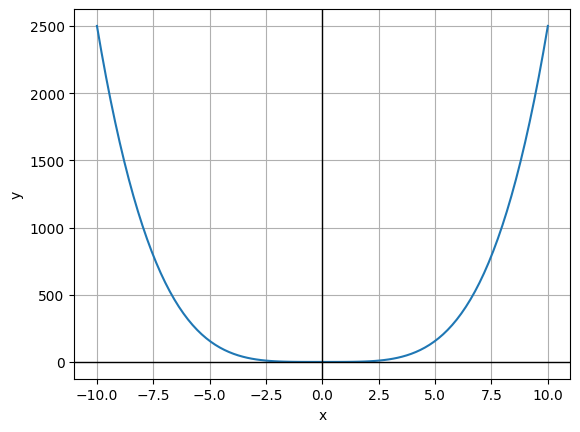

In [2]:
plt_function(functions.f)

Wykres gradientu funkcji f:
<span style = "font-size: 32px"> $$\nabla f(x) = x^3$$ </span>


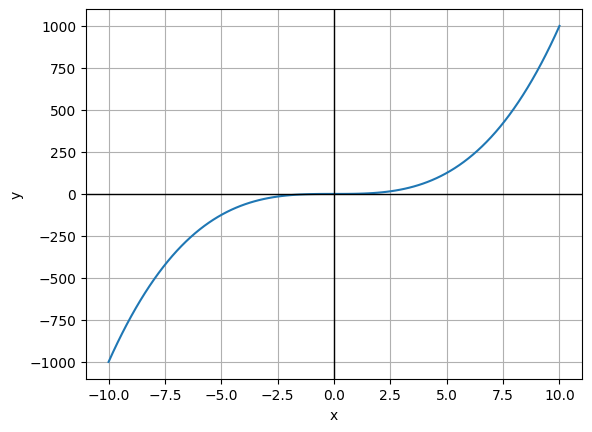

In [3]:
plt_function(functions.fGradient, True)

Wykres funkcji 2 zmiennych g:
<span style = "font-size: 32px">$$g(x) = 1.5 - e^{-x_1^2 - x_2^2} - 0.5e^{-(x_1-1)^2-(x_2+2)^2}$$ </span>

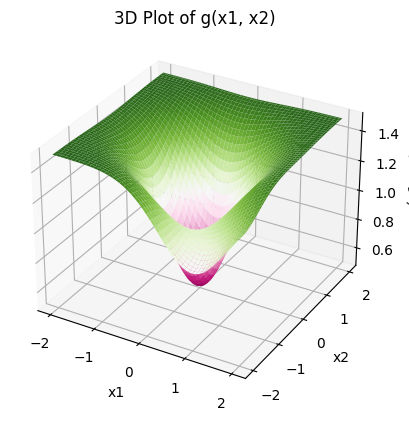

In [2]:
plt_function3D(functions.g)

Wykres gradientu funkcji g:
<span style = "font-size: 32px"> $$\nabla g(x) = \begin{bmatrix} 2x_1e^{-x_1^2 - x_2^2} + (x_1 - 1)e^{-(x_1-1)^2-(x_2+2)^2}  \\
2x_2e^{-x_1^2 - x_2^2} + (x_2 - 1)e^{-(x_1-1)^2-(x_2+2)^2} \end{bmatrix}$$
<br> <br> </span>

1 wektor:

![1 wektor gradientu g(x)](g(x)Gradient.png)

<br> <br> 2 wektor:

![2 wektor gradientu g(x)](g(x)Gradient2.png)
<br> <br>

<br> <br> 
## 2. Minimum funkcji:
Dla weryfikacji wyników algorytmu sprawdzam ze strony [Wolfram Alpha](https://www.wolframalpha.com/) wartości minimalne: 
<br>

<span style = "font-size: 32px">$$min(f(x)) = 0$$</span>
Osiąga taką wartość dla x = 0
<br> <br>

<span style = "font-size: 32px">$$min(g(x_1, x_2)) ≈ 0,49662 $$</span>

Osiąga taką wartość dla x1 ≈ -0.0033 oraz x2 ≈ -0.0033
<br> <br> <br>

## 3. Przykładowe pomiary f(x):
Potrzebne importy:
<br>

In [2]:
from measurements import stepLenDependency, plt_accuracy, plt_stepLen

### Pomiary dla precyzji 10^-4, zaczynając od punktu x = 1


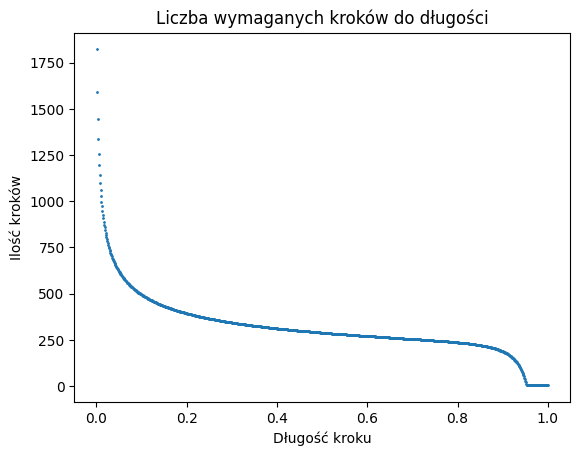

In [5]:
measurements = stepLenDependency(functions.f, functions.fGradient, 1e-4, 0.001, 1e6, 1)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

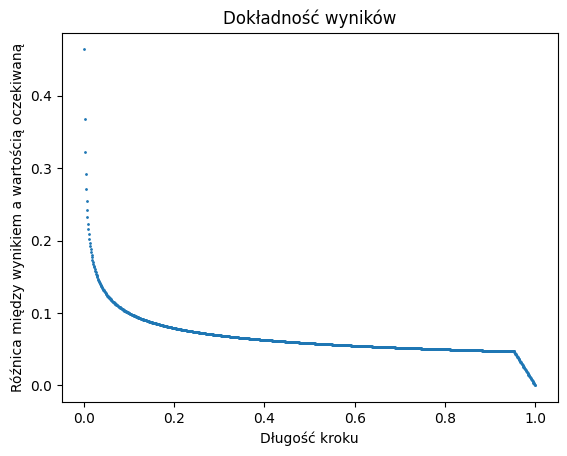

In [6]:
plt_accuracy(measurements, 0, "Dokładność wyników", 0.001)

Dla tego przykładu możemy zauważyć, że duży krok zadziałał dobrze ze względu na to, że po paru pierwszych iteracjach prawie od razu znalazł się w punkcie

### Pomiary dla precyzji 10^-6, zaczynając od punktu x = 1

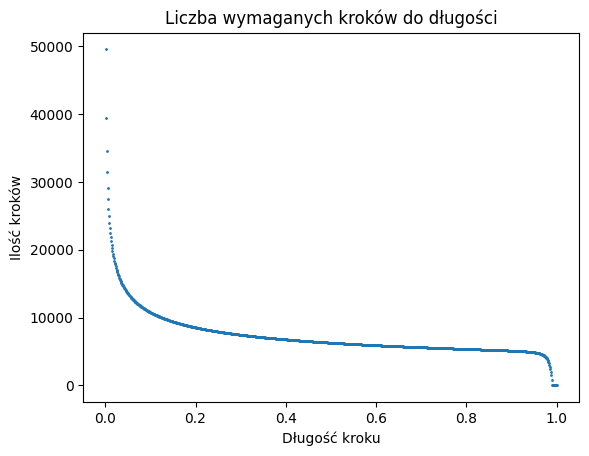

In [7]:
measurements = stepLenDependency(functions.f, functions.fGradient, 1e-6, 0.001, 1e6, 1)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

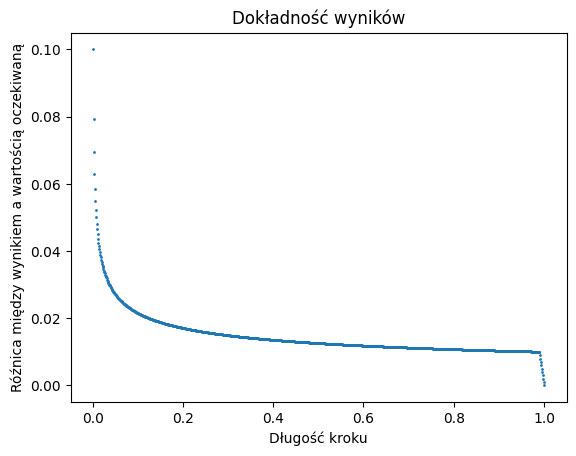

In [8]:
plt_accuracy(measurements, 0, "Dokładność wyników", 0.001)

Za pomocą większej precyzji możemy lepiej zaobserwować to co otrzymaliśmy w poprzednim eksperymencie. Co ciekawe spadek przesunął się bardziej w stronę okolicy x=1.

### Pomiary dla precyzji 10^-4, zaczynając od punktu x = 2

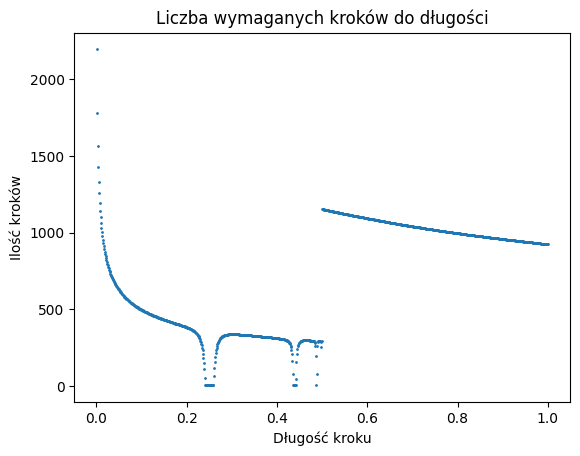

In [9]:
measurements = stepLenDependency(functions.f, functions.fGradient, 1e-4, 0.001, 1e6, 2)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

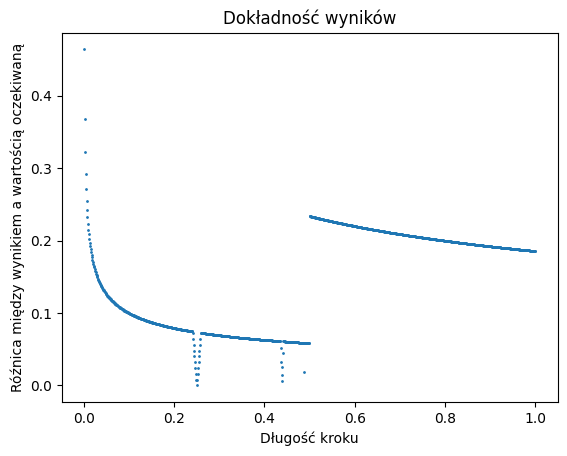

In [10]:
plt_accuracy(measurements, 0, "Dokładność wyników", 0.001)

### Pomiary dla precyzji 10^-4, zaczynając od punktu x = 2.9

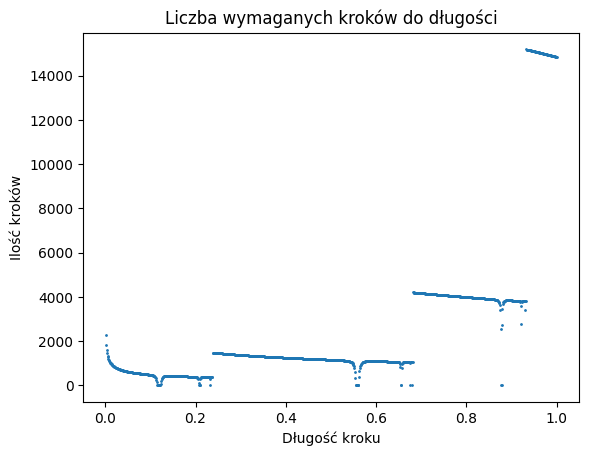

In [11]:
measurements = stepLenDependency(functions.f, functions.fGradient, 1e-4, 0.001, 1e6, 2.9)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

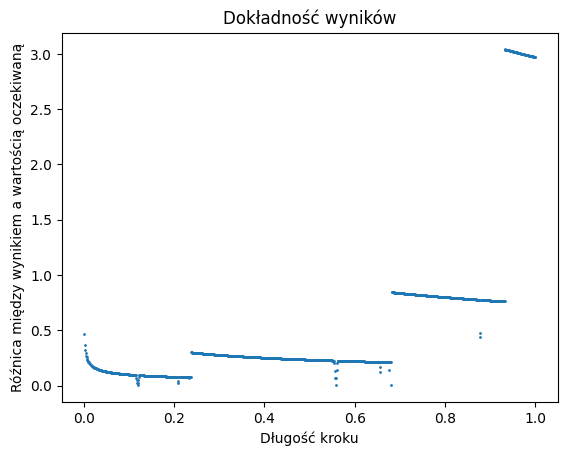

In [12]:
plt_accuracy(measurements, 0, "Dokładność wyników", 0.001)

Względem poprzednich wyników, możemy zauważyć spory spadek efektywności algorytmu w przypadku x0 oddalonego od naszego punktu docelowego.

### Średnia wartość dla 500 pomiarów przy precyzji 10^-4 z losowymi x0:
Wybieramy losowe wartości x0 od -2.9 do 2.9, ponieważ poza tym obszarem inne argumenty początkowe dla tej funkcji nie są efektywne.
<br> <br>
Potrzebne importy:

In [3]:
from measurements import randXMeasurements


In [4]:
measurements = randXMeasurements(functions.f, functions.fGradient, 1e-4, 0.001, 1e8, 1000, [-2.9, 2.9])


Wylosowane x:

In [5]:
print(measurements[1])

[0.3303786859799911, -2.6248436915954936, 1.2169740429302451, 0.7314435169554803, -2.107909381904179, 2.0629878450596135, -2.1510633029516155, 0.6081326362440409, -1.8374285938151862, -0.0006077928428402934, 1.1004914580889147, 1.4693320303614992, -1.0793958831091717, 1.1121889227068347, -1.9804350825309034, -2.7486326643482504, -0.4715790510817217, -0.1823436101914453, -0.8929225516523225, -2.062753051783304, 0.1129806185184874, 2.2779251185229135, 2.155798788759785, 1.4203452620199415, 1.3893342678798581, 2.032753522573413, -1.433556827780253, -2.624043538033997, -0.8747742540315433, 1.321848469475698, -2.5683904774114317, -0.5182002255711766, 1.0408779175522875, -1.1189261342090697, -0.7853077722357305, -0.4882666837419176, -1.2695389909622135, -1.4216059668471055, 1.29399718861572, 0.5253761322217074, 0.36335037449495067, 2.8289169576309097, -0.24172700726146568, -0.660200785687763, 1.1137193211434204, -1.8042489764796525, -0.36185071199509755, 1.9275117824277834, 0.617891175918423

Średnia x:

In [9]:
np.average(measurements[1])

0.0725303192408391

Odchylenie standardowe:

In [6]:
np.std(measurements[1])

1.6492755605362968

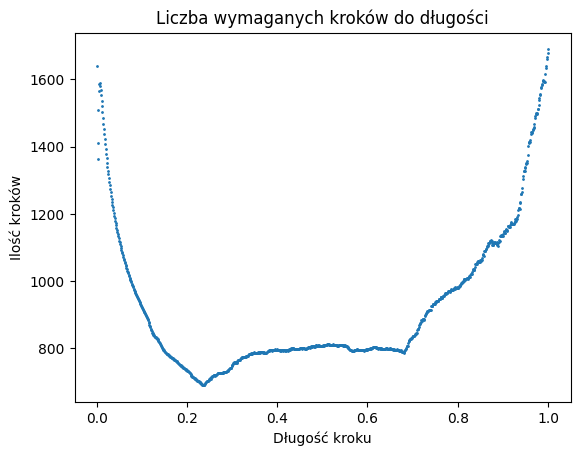

In [7]:
plt_stepLen(measurements[0], "Liczba wymaganych kroków do długości", 0.001)

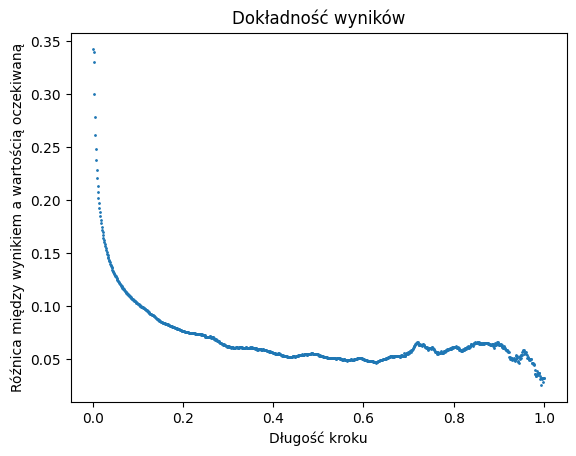

In [8]:
plt_accuracy(measurements[0], 0, "Dokładność wyników", 0.001)

## 3. Przykładowe pomiary g(x):


### Pomiary dla precyzji 10^-4, zaczynając od punktu x1 = 1, x2 = 1

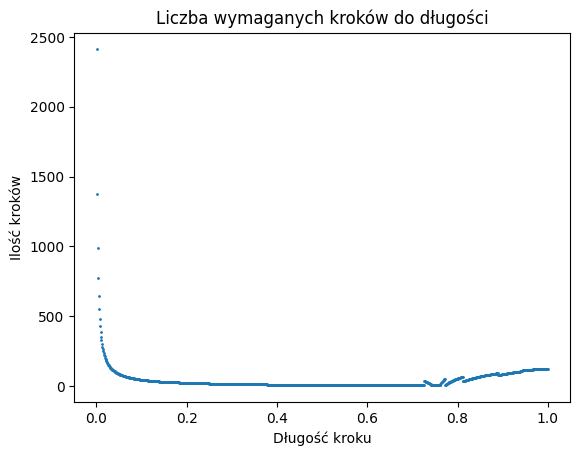

In [22]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-4, 0.001, 1e6, [1,1], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

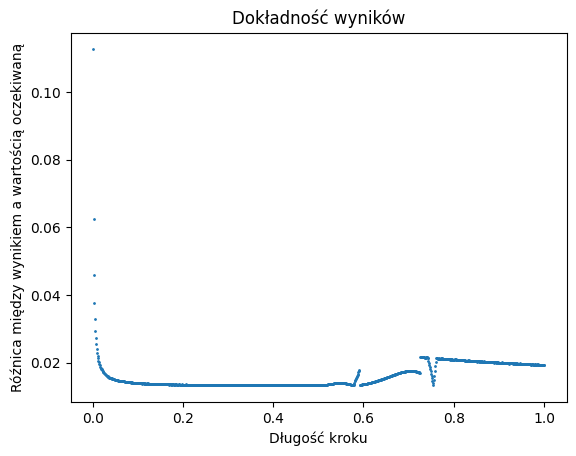

In [23]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

### Pomiary dla precyzji 10^-4, zaczynając od punktu x1 = 2, x2 = 1

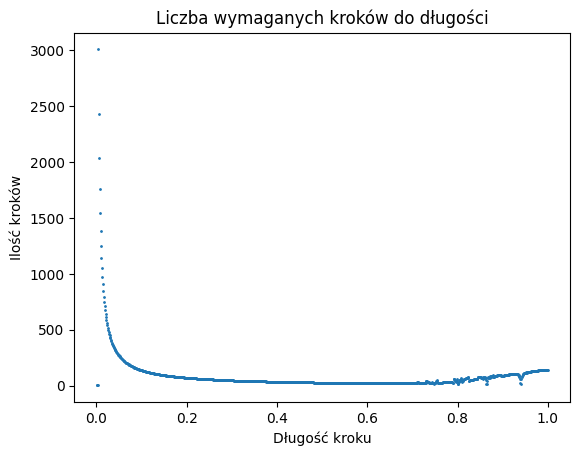

In [24]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-4, 0.001, 1e6, [2,1], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

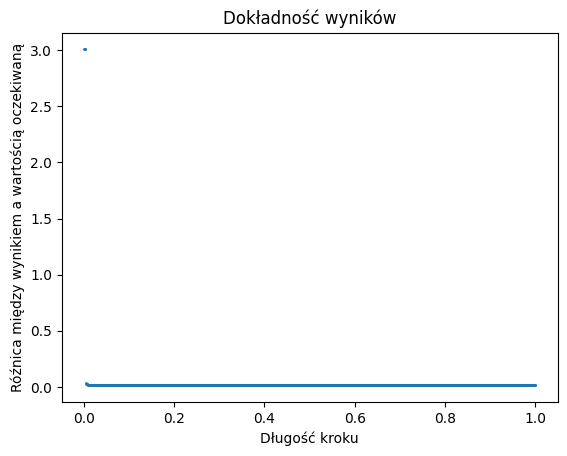

In [25]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

### Pomiary dla precyzji 10^-4, zaczynając od punktu x1 = 1, x2 = 2

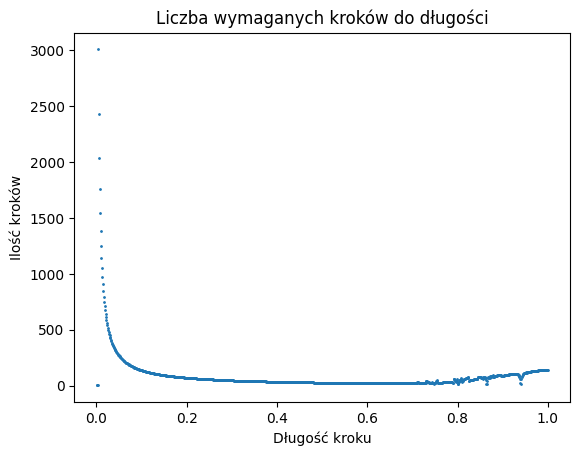

In [26]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-4, 0.001, 1e6, [2,1], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

Jak możemy zauważyc przez kształt funkcji g(x) zamiana x1 oraz x2 miejscami w większości przypadków będzie zwracała takie same wartości

### Pomiary dla precyzji 10^-4, zaczynając od punktu x1 = 2, x2 = 2

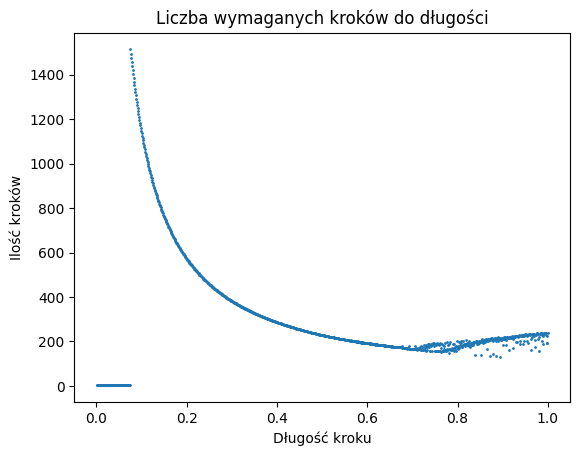

In [27]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-4, 0.001, 1e6, [2,2], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

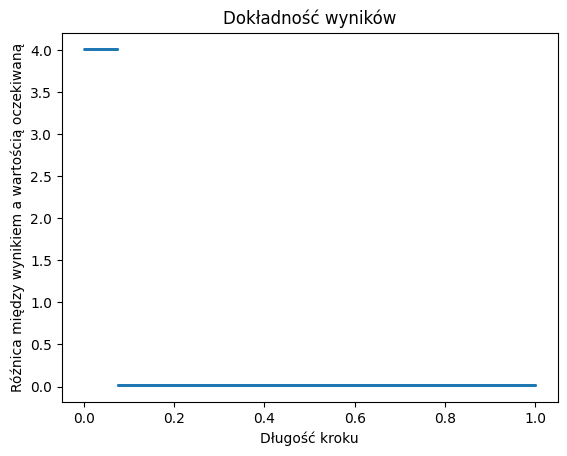

In [28]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

Przy małych krokach dla x0 oddalonego bardziej od oczekiwanego wyniku, algorytm sobie nie radzi kończąc swoje działanie po 1-2 krokach.

### Pomiary dla precyzji 10^-8, zaczynając od punktu x1 = 2, x2 = 2
Biorąc pod uwage wyniki z poprzedniego pomiaru sprawdźmy czy zwiększenie precyzji umożliwi algorytmowi dojście do oczekiwanego wyniku.

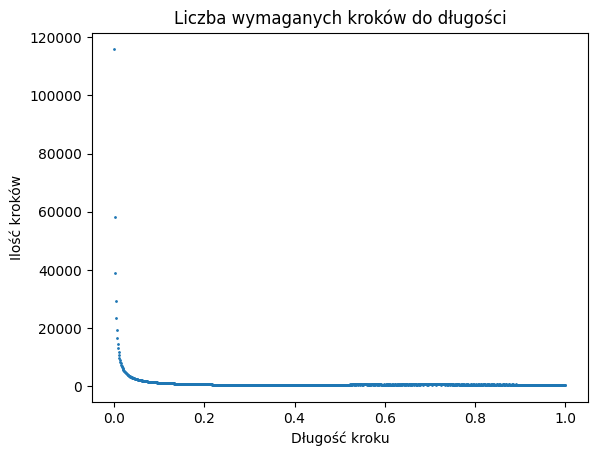

In [29]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-8, 0.001, 1e6, [2,2], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

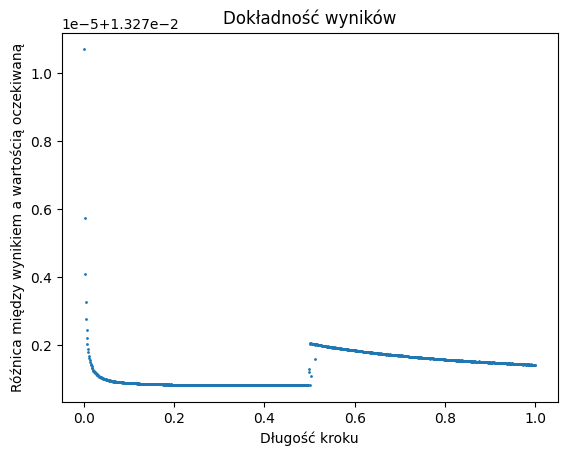

In [30]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

Możemy zauważyć, że przy większej precyzji wyeliminowaliśmy sytuacje w której ta funkcja kończy swoje działanie z zła wartości i małą ilością prób.

### Pomiary dla precyzji 10^-6, zaczynając od punktu x1 = 2.5, x2 = 2.5

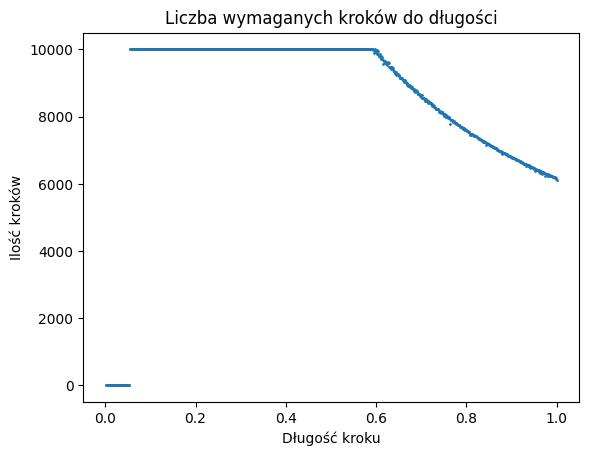

In [31]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-6, 0.001, 1e4, [2.5,2.5], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

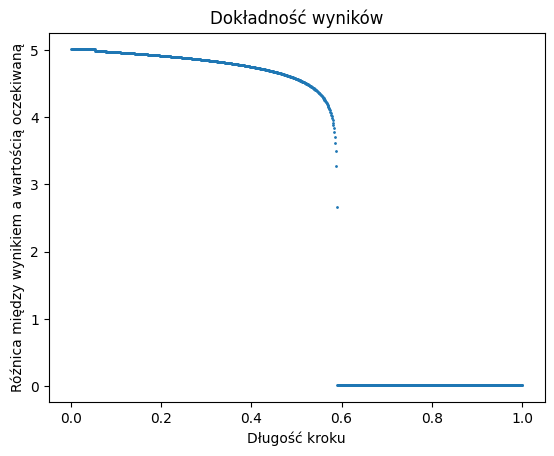

In [32]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

Używanie punktów startowych powyżej 2 okazuje się już nieefektywne.

### Pomiary dla precyzji 10^-6, zaczynając od punktu x1 = 3, x2 = 3

W celach eksperymentu sprawdzimy jak algorytm reaguje dla większych punktów przy funkcji g(x)

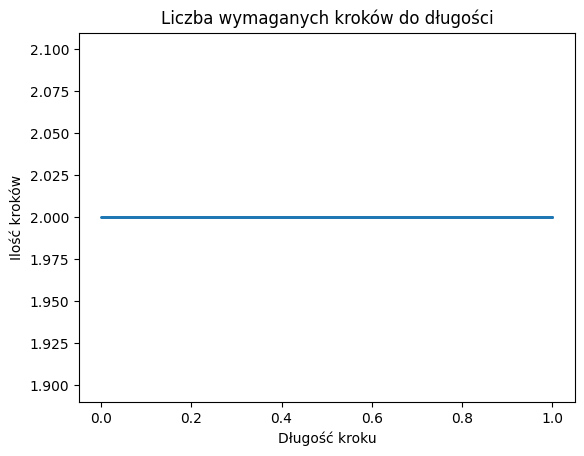

In [33]:
measurements = stepLenDependency(functions.g, functions.gGradient, 1e-6, 0.001, 1e4, [3,3], True)
plt_stepLen(measurements, "Liczba wymaganych kroków do długości", 0.001)

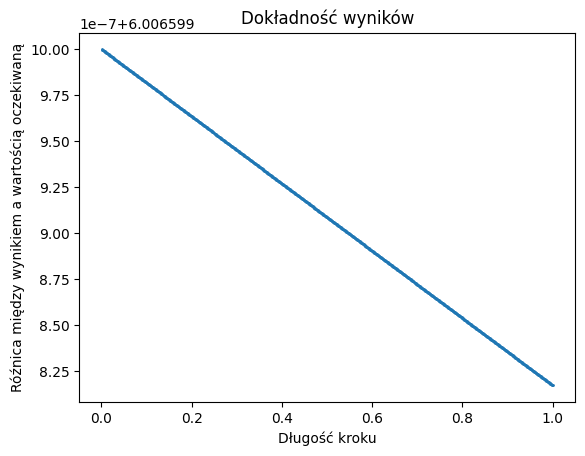

In [34]:
plt_accuracy(measurements, [-0.0033,-0.0033], "Dokładność wyników", 0.001, True)

Podobnie jak w funkcji f(x) widzimy, że nie radzi on sobie z większymi x0, w tym przypadku powyżej x >= 3. <br>
W g(x) wynika to z bardzo bliskich zeru wartości gradientu.

### Średnia wartość dla 1000 pomiarów przy precyzji 10^-4 z losowymi x0:
Wybieramy losowe wartości x1, x2 od -2 do 2, ponieważ poza tym obszarem inne argumenty początkowe dla tej funkcji nie są efektywne.
<br> <br>


In [10]:
measurements = randXMeasurements(functions.g, functions.gGradient, 1e-4, 0.001, 1e8, 1000, [-2,2], 2)


wylosowane x:

In [11]:
print(measurements[1])


[[0.965178005265293, -0.6787151745522517], [1.8923316967177102, 0.9127268145520238], [1.2437204682112863, -1.5976104106074067], [0.3546278923391166, -0.2657643908971443], [0.9167102693552334, 0.8890955427227953], [-1.2645077205642554, -0.6512995756087734], [1.5860758122716403, -1.4443843098765412], [-1.9848205593326922, -1.069352415027868], [-0.8833058431675136, 0.6067279808853296], [-0.74128036835774, 1.991825437206891], [-0.4273486792686749, -1.6731813442495724], [1.338327601597237, -1.4215598218636551], [0.580534037519981, 0.1714213686342725], [1.2437881407625997, 0.12214040082437005], [-0.5804824093191816, -1.563266716439884], [1.1050754862490901, 0.9109844153909359], [-1.1353604969188362, -0.5163258208360646], [0.09167953060154543, -1.8364119720177494], [-1.5846104061602895, -1.1264870408545438], [1.1379980718183886, -0.21829877897015848], [0.24955292395633943, 1.042126190782119], [0.01750286997210404, 1.3130661926912177], [1.5553681459942301, 1.9685609316636126], [0.3528485278327

Średnia z wylosowanych x:

In [19]:
print("Średnia x1: ", np.mean([x[0] for x in measurements[1]]))
print("Średnia x2: ", np.mean([x[1] for x in measurements[1]]))

Średnia x1:  -0.026094217347744343
Średnia x2:  -0.016167714063717517


Odchylenie standardowe:

In [20]:
print("Odchylenie x1: ", np.std([x[0] for x in measurements[1]]))
print("Odchylenie x2: ", np.std([x[1] for x in measurements[1]]))

Odchylenie x1:  1.1787761967863988
Odchylenie x2:  1.1611502115076855


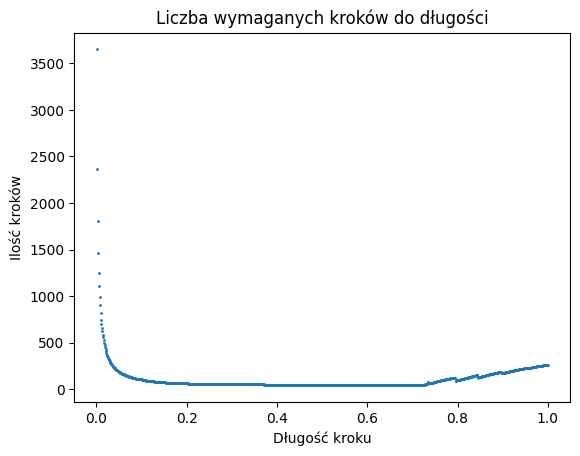

In [21]:
plt_stepLen(measurements[0], "Liczba wymaganych kroków do długości", 0.001)


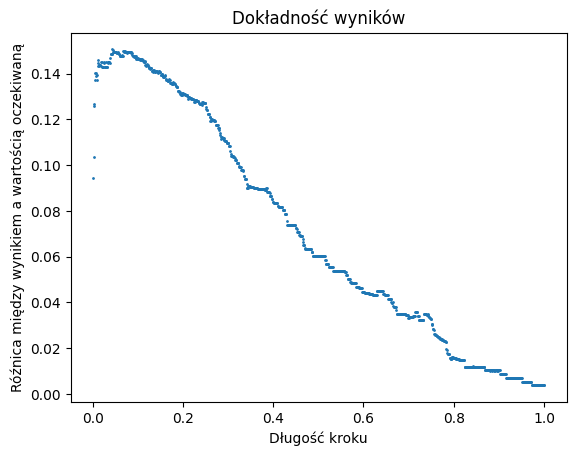

In [22]:
plt_accuracy(measurements[0], 0, "Dokładność wyników", 0.001)

## 4. Znalezienie uniwersalnego długości kroku dla obu funkcji

Moim zdaniem dla f(x) tym krokiem który łączy precyzje z małą ilością wymaganych kroków dla różnych punktów startowych w efektywnym dla funkcji zakresie jest: 0.23 <br>
Natomiast dla g(x1, x2) jest to: 0.71 <br>
## Działanie algorytmu przy najlepszych krokach:

### Potrzebne importy:

In [3]:
from mySolver import mySolver

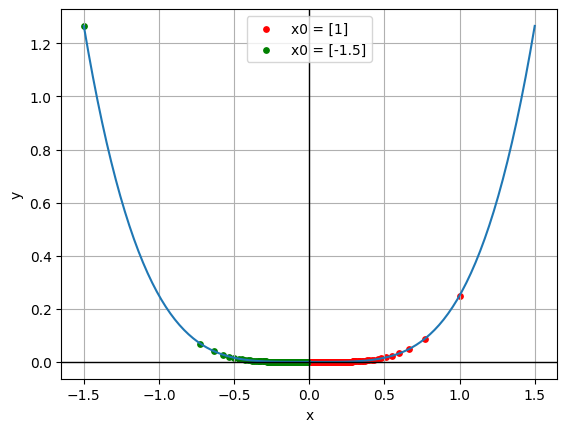

In [11]:
solver = mySolver(0.23, 1e-6, 1e6)
measurement1 = solver.solve(functions.f, functions.fGradient, [1], True)
measurement2 = solver.solve(functions.f, functions.fGradient, [-1.5], True)

plt_function(functions.f, False, 1.5, [measurement1[2], measurement2[2]], ['red', 'green'])


Jak widać nasz algorytm już po 1 kroku znajduje się blisko, a w następnych idzie szybko i bez problemów do celu.

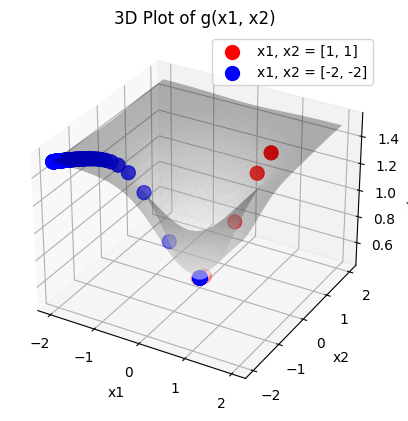

In [4]:
solver = mySolver(0.71, 1e-6, 1e6)
measurement1 = solver.solve(functions.g, functions.gGradient, [1, 1], True)
measurement2 = solver.solve(functions.g, functions.gGradient, [-2, -2], True)
plt_function3D(functions.g, [measurement1[2], measurement2[2]], ['red', 'blue'], 'Greys', 0.3)


## 5. Wnioski z eksperymentów oraz podsumowanie:

Algorytm gradientu prostego jest efektywnym sposobem szukania minimum lecz posiada sporo wad:
- Nie radzi sobie z punktami startowymi oddalonymi od punktu docelowego
- Zdarzają się sytuacje przeskoczenia punktu oraz odbijania się na zmiane z jego lewej i prawej strony
- Przy skrajnych wartościach gradientu nawet przy dużej precyzji algorytm nie jest w stanie osiągnąć zawsze celu
- Wpadanie do ekstremów lokalnych
- Bardzo czuły na parametry, różnica 0.001 między długościami kroku może zadecydować o tym czy otrzymamy poprawny wynik <br>


Z drugiej strony musimy pamiętać o jego dobrych stronach: <br>
- Prosty do napisania
- Szybki, przez małą ilość operacji do wykonania w każdej iteracji
- Intuicyjny, łatwo zrozumieć jego idee
<br>

Uważam, że jest to dobry fundament który po rozbudowie o między innymi: mechanizm pozwalający nam na wychodzenie z minimów lokalnych oraz odpowiednie dostosowywanie learning rate w trakcie wykonania mógłby okazać się bardzo przydatnym narzędziem.